<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 9** - Oct 5, 2016

- Bayesian inference recap
- Sampling from posterior
- Marginal likelihood
- Model comparison

<hr/>

<h1><font color="darkblue">Bayesian Inference</font></h1>

Rev. Thomas Bayes (c.1701-1761)

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif align=left height=200>


### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta|D,M) = \frac{p(\theta|M)\ p(D|\theta,M)}{p(D|M)}$ 

> or

>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$

- Recall posterior, prior, likelihood, normalization

### Likelihood Function
- A set of independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_D(\theta) = p(D|\theta) = p(\{x_i\}|\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{i}(\theta)$

- Maximum Likelihood Estimation (MLE) 

 - Gaussians cf. method of least squares

### Multiple Datasets

- If the data set $D$ consists of two subsets of $D_1$ and $D_2$, we can consider them together or separately

>$\displaystyle p(\theta|D_1 D_2) = \frac{p(\theta)\, p(D_1 D_2|\theta)}{p(D_1 D_2)}$

> also 


>$\displaystyle p(\theta|D_1 D_2) = \frac{p(\theta|D_1)\, p(D_2|\theta, D_1)}{p(D_2|D_1)}$




- Because

>$\displaystyle p(\theta|D) = p(\theta|\color{green}{D_1} \color{red}{D_2}) = \frac{p(\theta|\color{green}{D_1})\, p(\color{red}{D_2}|\theta, \color{green}{D_1})}{p(\color{red}{D_2}|\color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1}|\theta)\, p(\color{red}{D_2}|\theta, \color{green}{D_1})}{p(\color{green}{D_1})\,p(\color{red}{D_2}|\color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1}\color{red}{D_2}|\theta)}{p(\color{green}{D_1} \color{red}{D_2})}$
>$\displaystyle = \frac{p(\theta)\,p(D|\theta)}{p(D)}$

- Incremental learning


>$\displaystyle D = \big\{ \color{green}{D_1},\ \color{red}{D_2},\ \color{darkblue}{D_3}, \dots \color{black}{D_N} \big\}$

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### Importance Sampling

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,g(\theta)\,d\theta$

- If we can't sample from $g(\cdot)$ but can from a $h(\cdot)$ 

> s.t. $\ \ \ g(\theta) \leq K \cdot h(\theta) \ \ \ $ for any $\theta$ and a suitably large $K$

>$\displaystyle \langle f(\theta)\rangle \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{g(\theta_i)}{h(\theta_i)}$

### Markov-chain Monte Carlo a.k.a. MCMC

- Instead of independent samples, produce a chain of samples in a special way

> **Metropolis-Hastings**
> 0. Start from a random $\theta_t = \theta_0$ parameter set
> 0. Obtain a new $\theta'$ from a proposal distribution $Q(\theta;\theta_t)$
> 0. Accept $\theta_{t+1} = \theta'$ with probability $g(\theta')/g(\theta_t)$
> 0. Let $t\leftarrow t\!+\!1$ and go to Step 2.

- Use the samples of the chain as if taken from the posterior PDF

  - Many other variants 

  - Watch out for burn in, correlations, etc...

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a6/3dRosenbrock.png width=400 align=left>

### Model Comparison

- Bayesian hypothesis testing

> Posterior probability of a model given the data vs another (odds)

>$\displaystyle \frac{P(M_1|D)}{P(M_2|D)} = \frac{P(M_1)\ p(D|M_1)\,/\,p(D)}{P(M_2)\ p(D|M_2)\,/\,p(D)}$
>$\displaystyle = \frac{P(M_1)}{P(M_2)} \frac{p(D|M_1)}{p(D|M_2)}$

>$\displaystyle \ \ \ \ = \frac{P(M_1)}{P(M_2)}\times B(M_1,M_2|D)$

> Posterior odds $=$ Prior odds $\times$ the Bayes factor


### Marginal Likelihood

- Integral over all parameters

>$\displaystyle p(D|M) = \int  p(\theta|M)\ p(D|\theta,M) d\theta$ 


> Cf. Bayes' rule

>$\displaystyle p(\theta|D,M) = \frac{p(\theta|M)\ p(D|\theta,M)}{p(D|M)}$ 

- No improper prior here!

### Complementer Hypotheses

- I.e., $P(M_1) + P(M_2) = 1$ also $P(M_1|D) + P(M_2|D) = 1$ 

> Let $P$ represent $P(M_1|D)$ and $P_0$ be $P(M_1)$

>$\displaystyle \frac{P}{1-P} = \frac{P_0}{1-P_0} B$

> Hence

>$\displaystyle P = \left[ 1 + \frac{1-P_0}{P_0 B} \right]^{-1}   $


Populating the interactive namespace from numpy and matplotlib


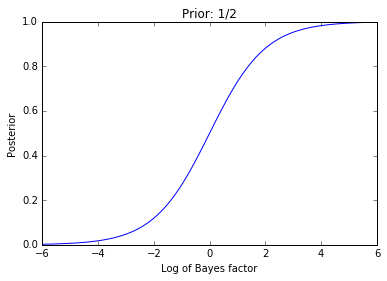

In [1]:
%pylab inline
# Posterior as fn of ln(B)
logB = np.linspace(-6,6,100) 
B = np.exp(logB)
P0 = 0.5
P = 1 / (1 + (1-P0)/(P0*B)) 
plt.plot(logB, P,'-'); 
# sigmoid function cf. neural networks
xlabel('Log of Bayes factor'); ylabel('Posterior'); title('Prior: 1/2');